<a href="https://colab.research.google.com/github/sandhrasunnyk009/INSE6220_HeartDisease/blob/main/Principal%20Component%20Analysis%20and%20Heart%20Disease%20Diagnosis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pycaret

In [19]:
!pip install "schemdraw<0.16"

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


Description:
This dataset includes 14 features known to contribute to heart attack risk. It is ideal for training machine learning models aimed at early detection and prevention of heart disease. The records have been cleaned by removing missing data to ensure data integrity. This dataset can be applied to various machine learning algorithms, including classification models such as Decision Trees, Neural Networks, and others.

Feature Descriptions:

1)age: Age of the patient (Numeric).

2)sex: Gender of the patient. Values: 1 = male, 0 = female.

3)cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.

4)trestbps: Resting Blood Pressure (in mm Hg) (Numeric).

5)chol: Serum Cholesterol level (in mg/dl) (Numeric).

6)fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.

7)restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.

8)thalach: Maximum heart rate achieved (Numeric).

9)exang: Exercise-induced angina. Values: 1 = yes, 0 = no.

10)oldpeak: ST depression induced by exercise relative to rest (Numeric).

11)slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.

12)ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.

13)thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.

14)
target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.

In [22]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sandhrasunnyk009/INSE6220_HeartDisease/refs/heads/main/cleaned_merged_heart_dataset.csv')
df.head(25)

age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0    63    1   3       145   233    1        0       150      0      2.3   
1    37    1   2       130   250    0        1       187      0      3.5   
2    41    0   1       130   204    0        0       172      0      1.4   
3    56    1   1       120   236    0        1       178      0      0.8   
4    57    0   0       120   354    0        1       163      1      0.6   
5    57    1   0       140   192    0        1       148      0      0.4   
6    56    0   1       140   294    0        0       153      0      1.3   
7    44    1   1       120   263    0        1       173      0      0.0   
8    52    1   2       172   199    1        1       162      0      0.5   
9    57    1   2       150   168    0        1       174      0      1.6   
10   54    1   0       140   239    0        1       160      0      1.2   
11   48    0   2       130   275    0        1       139      0      0.2   
12   49    1   1       130   266    0        1       171      0      0.6   
13   64    1   3       110   211    0        0       144      1      1.8   
14   58    0   3       150   283    1        0       162      0      1.0   
15   50    0   2       120   219    0        1       158      0      1.6   
16   58    0   2       120   340    0        1       172      0      0.0   
17   66    0   3       150   226    0        1       114      0      2.6   
18   43    1   0       150   247    0        1       171      0      1.5   
19   69    0   3       140   239    0        1       151      0      1.8   
20   59    1   0       135   234    0        1       161      0      0.5   
21   44    1   2       130   233    0        1       179      1      0.4   
22   42    1   0       140   226    0        1       178      0      0.0   
23   61    1   2       150   243    1        1       137      1      1.0   
24   40    1   3       140   199    0        1       178      1      1.4   

    slope  ca  thal  target  
0       0   0     1       1  
1       0   0     2       1  
2       2   0     2       1  
3       2   0     2       1  
4       2   0     2       1  
5       1   0     1       1  
6       1   0     2       1  
7       2   0     3       1  
8       2   0     3       1  
9       2   0     2       1  
10      2   0     2       1  
11      2   0     2       1  
12      2   0     2       1  
13      1   0     2       1  
14      2   0     2       1  
15      1   0     2       1  
16      2   0     2       1  
17      0   0     2       1  
18      2   0     2       1  
19      2   2     2       1  
20      1   0     3       1  
21      2   0     2       1  
22      2   0     2       1  
23      1   0     2       1  
24      2   0     3       1

In [23]:
len(df.index)

1888

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [25]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  1286


In [26]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


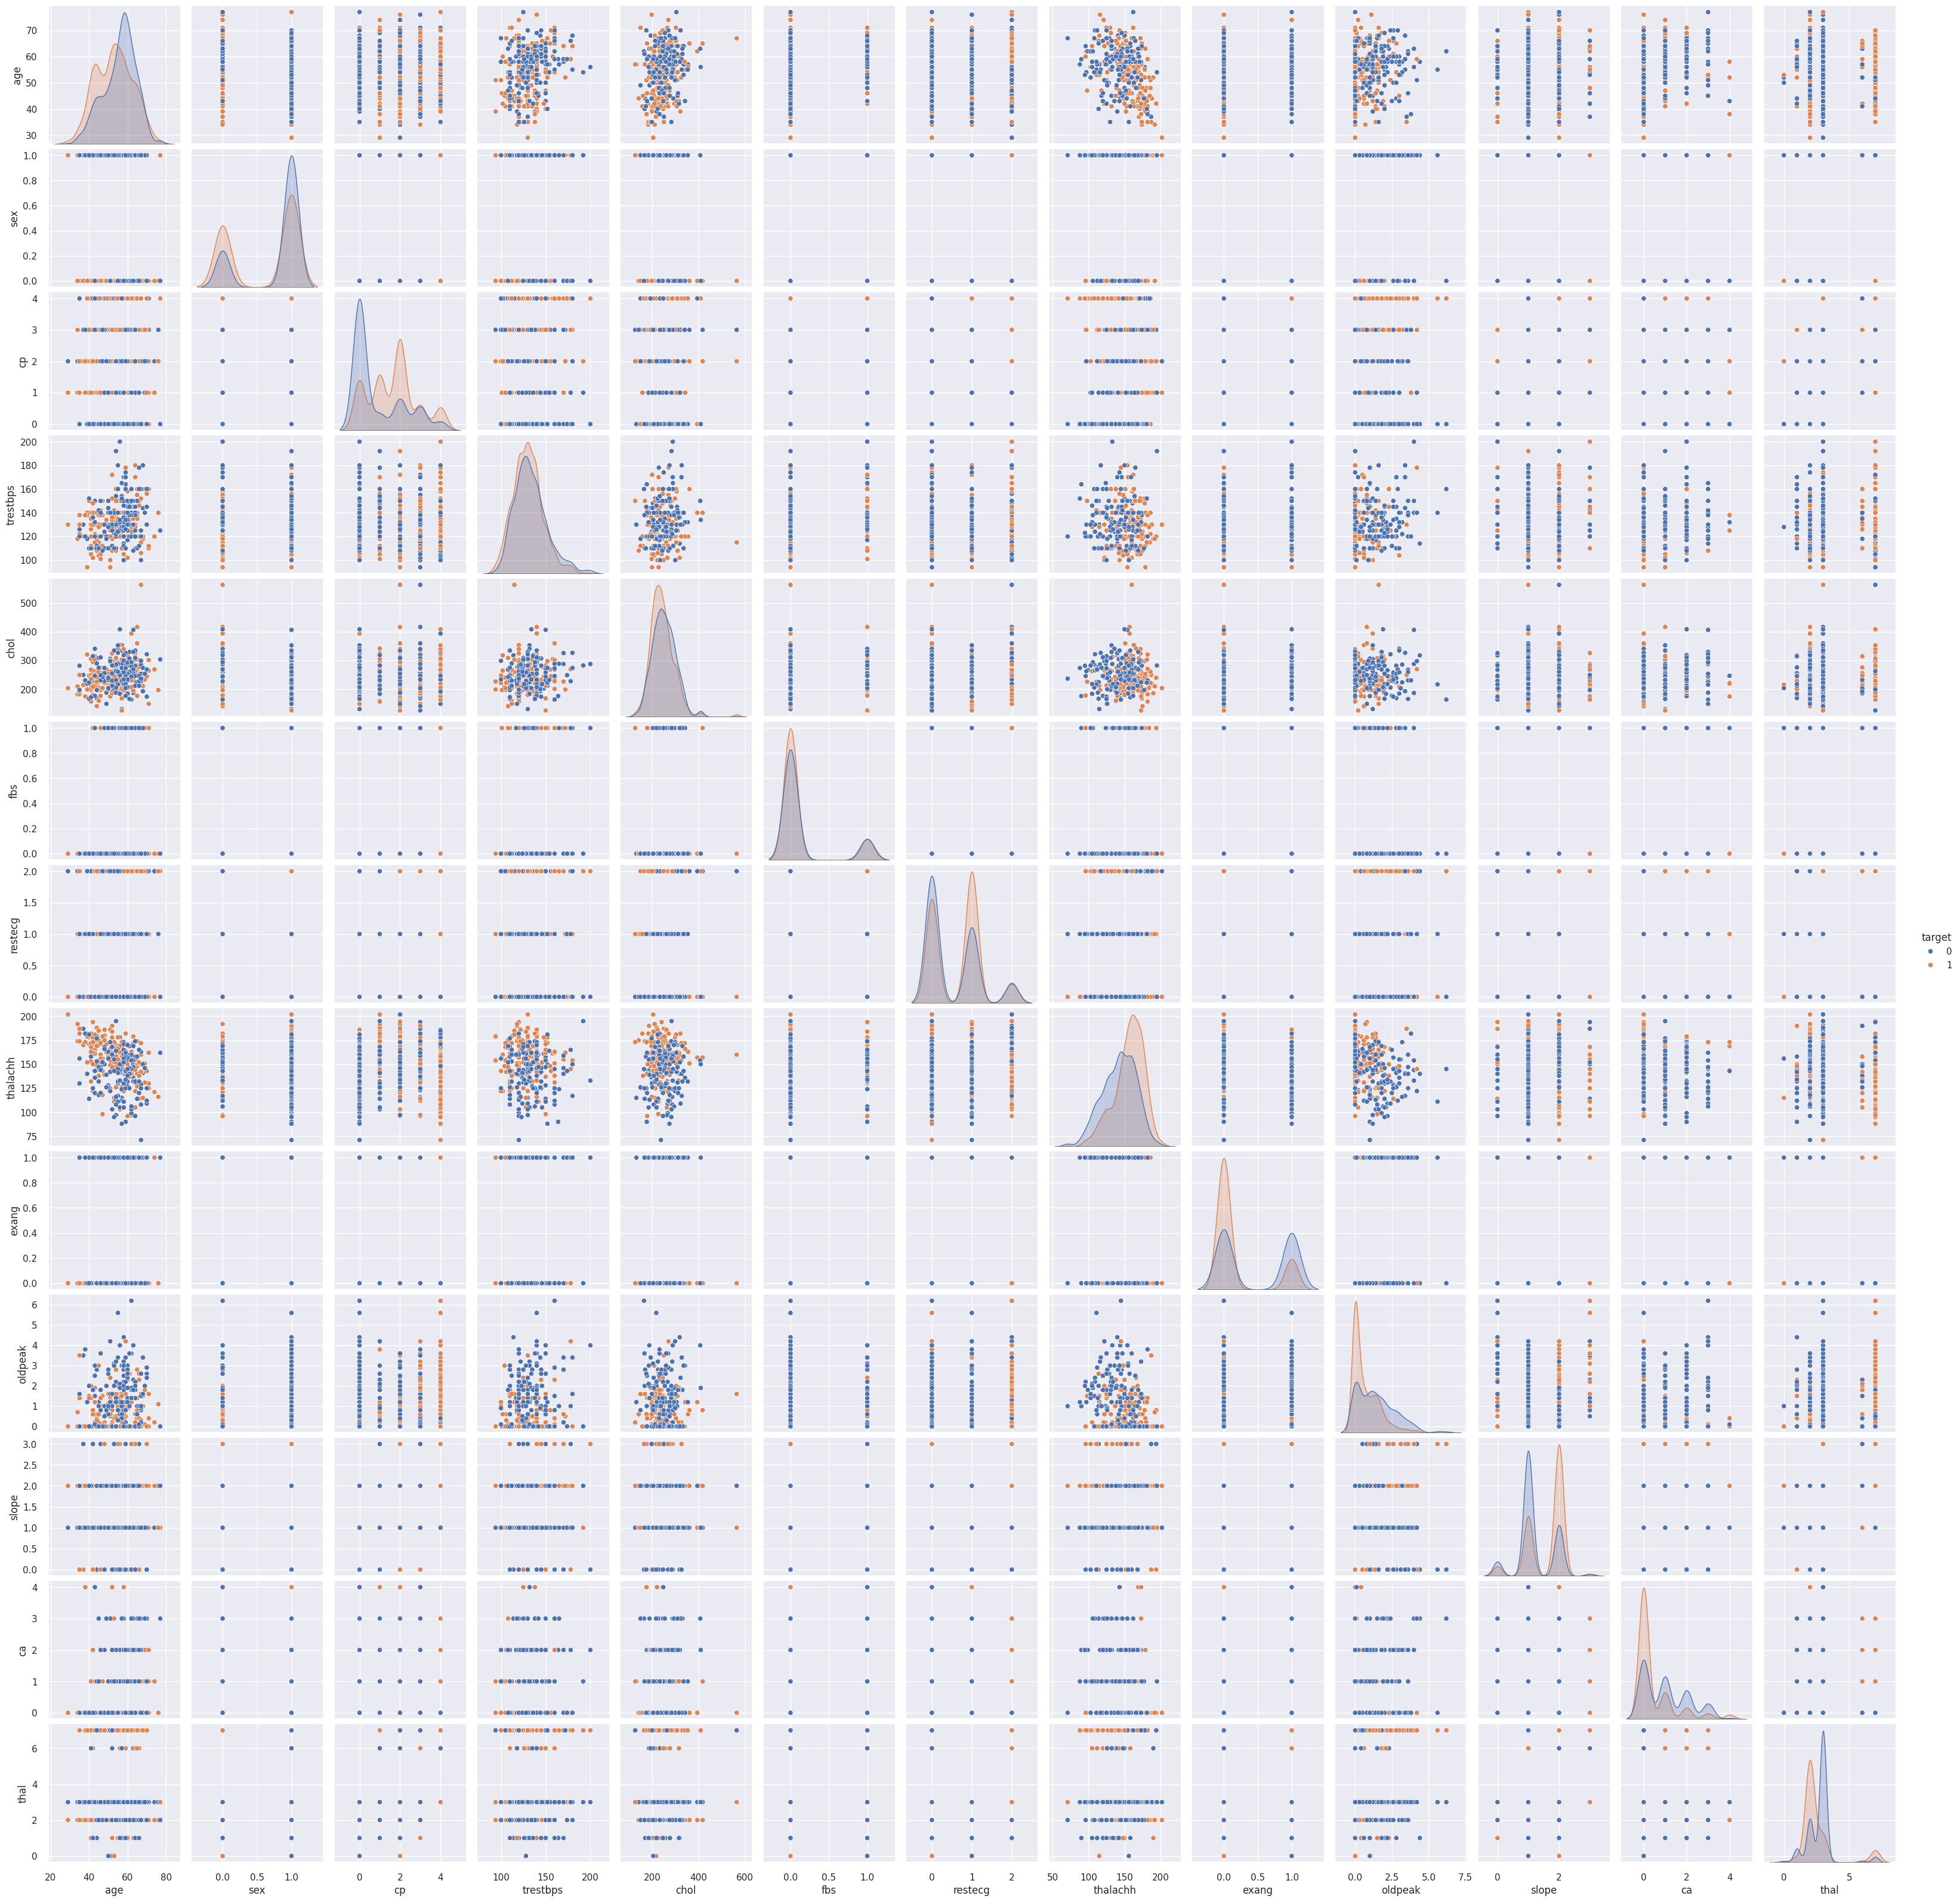

In [27]:
sns.pairplot(df, hue='target')
plt.show()

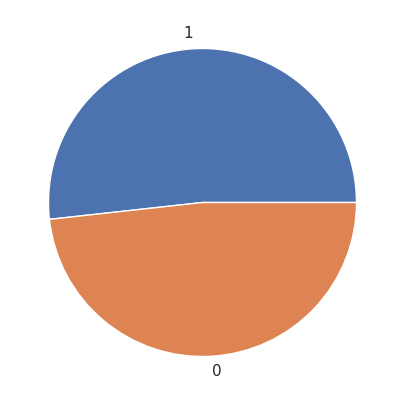

In [28]:
y =df['target']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [29]:
X = df.drop(columns=['target'])
X.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172      0      1.4   
3   56    1   1       120   236    0        1       178      0      0.8   
4   57    0   0       120   354    0        1       163      1      0.6   
5   57    1   0       140   192    0        1       148      0      0.4   
6   56    0   1       140   294    0        0       153      0      1.3   
7   44    1   1       120   263    0        1       173      0      0.0   
8   52    1   2       172   199    1        1       162      0      0.5   
9   57    1   2       150   168    0        1       174      0      1.6   

   slope  ca  thal  
0      0   0     1  
1      0   0     2  
2      2   0     2  
3      2   0     2  
4      2   0     2  
5      1   0     1  
6      1   0     2  
7      2   0     3  
8      2   0     3  
9      2   0     2

In [30]:
X.describe().transpose()

count        mean        std    min     25%    50%    75%    max
age       1888.0   54.354343   9.081505   29.0   47.75   55.0   61.0   77.0
sex       1888.0    0.688559   0.463205    0.0    0.00    1.0    1.0    1.0
cp        1888.0    1.279131   1.280877    0.0    0.00    1.0    2.0    4.0
trestbps  1888.0  131.549258  17.556985   94.0  120.00  130.0  140.0  200.0
chol      1888.0  246.855403  51.609329  126.0  211.00  241.0  276.0  564.0
fbs       1888.0    0.148305   0.355496    0.0    0.00    0.0    0.0    1.0
restecg   1888.0    0.597458   0.638820    0.0    0.00    1.0    1.0    2.0
thalachh  1888.0  149.424258  23.006153   71.0  133.00  152.0  166.0  202.0
exang     1888.0    0.331568   0.470901    0.0    0.00    0.0    1.0    1.0
oldpeak   1888.0    1.053761   1.161344    0.0    0.00    0.8    1.6    6.2
slope     1888.0    1.421610   0.619588    0.0    1.00    1.0    2.0    3.0
ca        1888.0    0.731462   1.015735    0.0    0.00    0.0    1.0    4.0
thal      1888.0    2.662606   1.249924    0.0    2.00    2.0    3.0    7.0

In [31]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952259  0.672538  1.343864  0.766322 -0.268538  2.396426 -0.935500   
1 -1.911461  0.672538  0.562942 -0.088265  0.060947 -0.417288  0.630301   
2 -1.470888 -1.486904 -0.217980 -0.088265 -0.830601 -0.417288 -0.935500   
3  0.181258  0.672538 -0.217980 -0.657990 -0.210394 -0.417288  0.630301   
4  0.291401 -1.486904 -0.998902 -0.657990  2.076620 -0.417288  0.630301   
5  0.291401  0.672538 -0.998902  0.481460 -1.063179 -0.417288  0.630301   
6  0.181258 -1.486904 -0.217980  0.481460  0.913732 -0.417288 -0.935500   
7 -1.140459  0.672538 -0.217980 -0.657990  0.312906 -0.417288  0.630301   
8 -0.259315  0.672538  0.562942  2.304579 -0.927508  2.396426  0.630301   
9  0.291401  0.672538  0.562942  1.051184 -1.528334 -0.417288  0.630301   

   thalachh    exang   oldpeak     slope        ca      thal  
0  0.025032 -0.70430  1.073386 -2.295053 -0.720321 -1.330518  
1  1.633724 -0.70430  2.106945 -2.295053 -0.720321 -0.530257  
2  0.981551 -0.70430  0.298216  0.933755 -0.720321 -0.530257  
3  1.242420 -0.70430 -0.218564  0.933755 -0.720321 -0.530257  
4  0.590248  1.41985 -0.390824  0.933755 -0.720321 -0.530257  
5 -0.061924 -0.70430 -0.563084 -0.680649 -0.720321 -1.330518  
6  0.155467 -0.70430  0.212086 -0.680649 -0.720321 -0.530257  
7  1.025030 -0.70430 -0.907604  0.933755 -0.720321  0.270003  
8  0.546770 -0.70430 -0.476954  0.933755 -0.720321  0.270003  
9  1.068508 -0.70430  0.470476  0.933755 -0.720321 -0.530257

In [32]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
age       1888.0  3.763468e-17  1.000265 -2.792605 -0.727423  0.071115   
sex       1888.0 -1.590065e-16  1.000265 -1.486904 -1.486904  0.672538   
cp        1888.0  4.516161e-17  1.000265 -0.998902 -0.998902 -0.217980   
trestbps  1888.0 -3.198948e-16  1.000265 -2.139274 -0.657990 -0.088265   
chol      1888.0  1.881734e-16  1.000265 -2.342356 -0.694931 -0.113486   
fbs       1888.0 -1.693561e-17  1.000265 -0.417288 -0.417288 -0.417288   
restecg   1888.0  1.053771e-16  1.000265 -0.935500 -0.935500  0.630301   
thalachh  1888.0 -2.446254e-16  1.000265 -3.409742 -0.714096  0.111988   
exang     1888.0  5.457028e-17  1.000265 -0.704300 -0.704300 -0.704300   
oldpeak   1888.0  7.950326e-17  1.000265 -0.907604 -0.907604 -0.218564   
slope     1888.0 -1.580657e-16  1.000265 -2.295053 -0.680649 -0.680649   
ca        1888.0  4.139815e-17  1.000265 -0.720321 -0.720321 -0.720321   
thal      1888.0  1.204310e-16  1.000265 -2.130778 -0.530257 -0.530257   

               75%       max  
age       0.731973  2.494262  
sex       0.672538  0.672538  
cp        0.562942  2.124786  
trestbps  0.481460  3.899808  
chol      0.564865  6.146730  
fbs      -0.417288  2.396426  
restecg   0.630301  2.196102  
thalachh  0.720683  2.285896  
exang     1.419850  1.419850  
oldpeak   0.470476  4.432454  
slope     0.933755  2.548159  
ca        0.264448  3.218757  
thal      0.270003  3.471045

In [33]:
observations = list(df.index)
variables = list(df.columns)

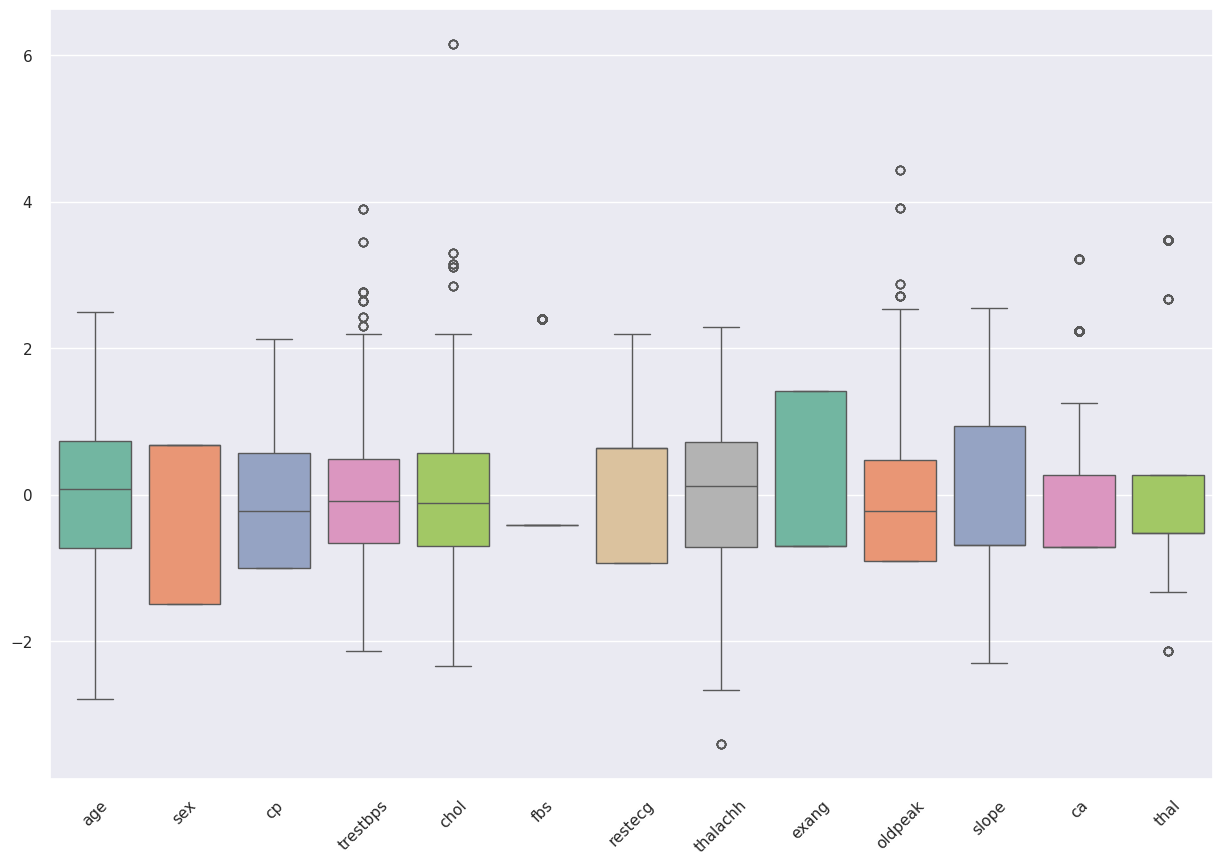

In [34]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

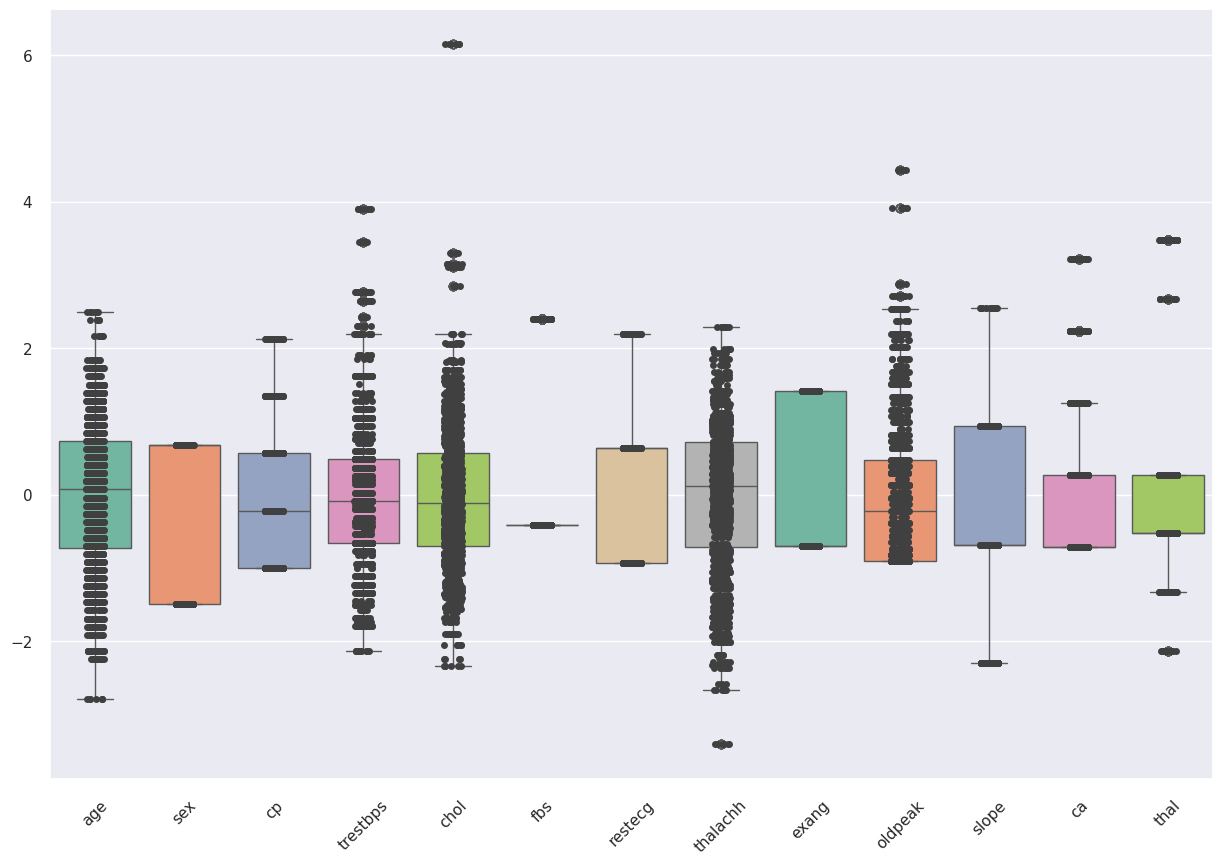

In [35]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

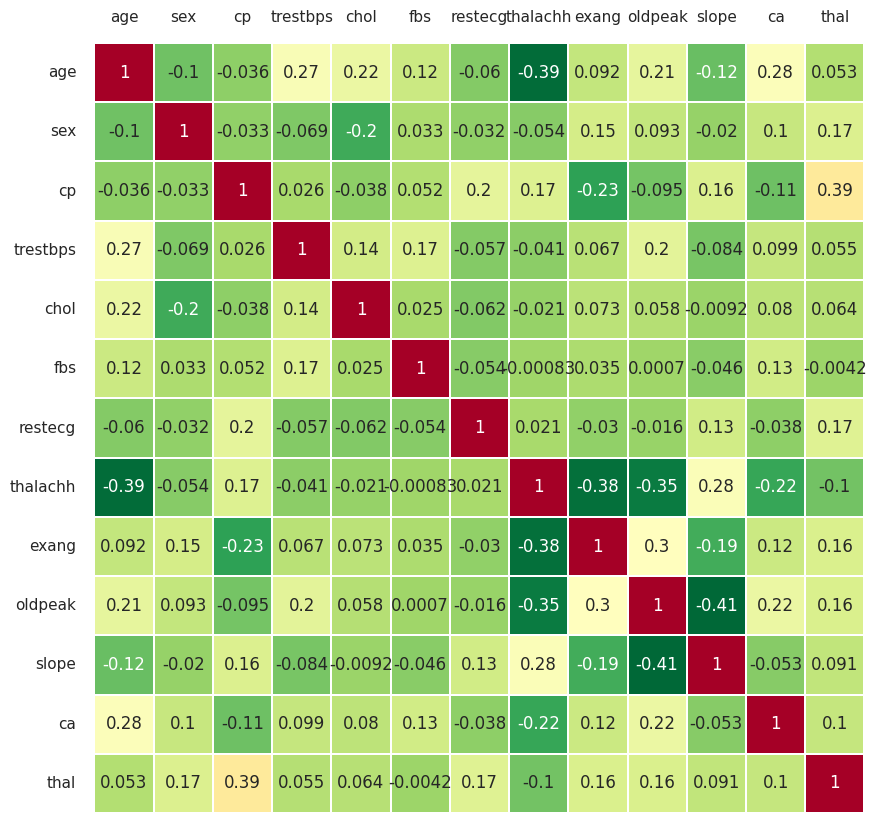

In [36]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

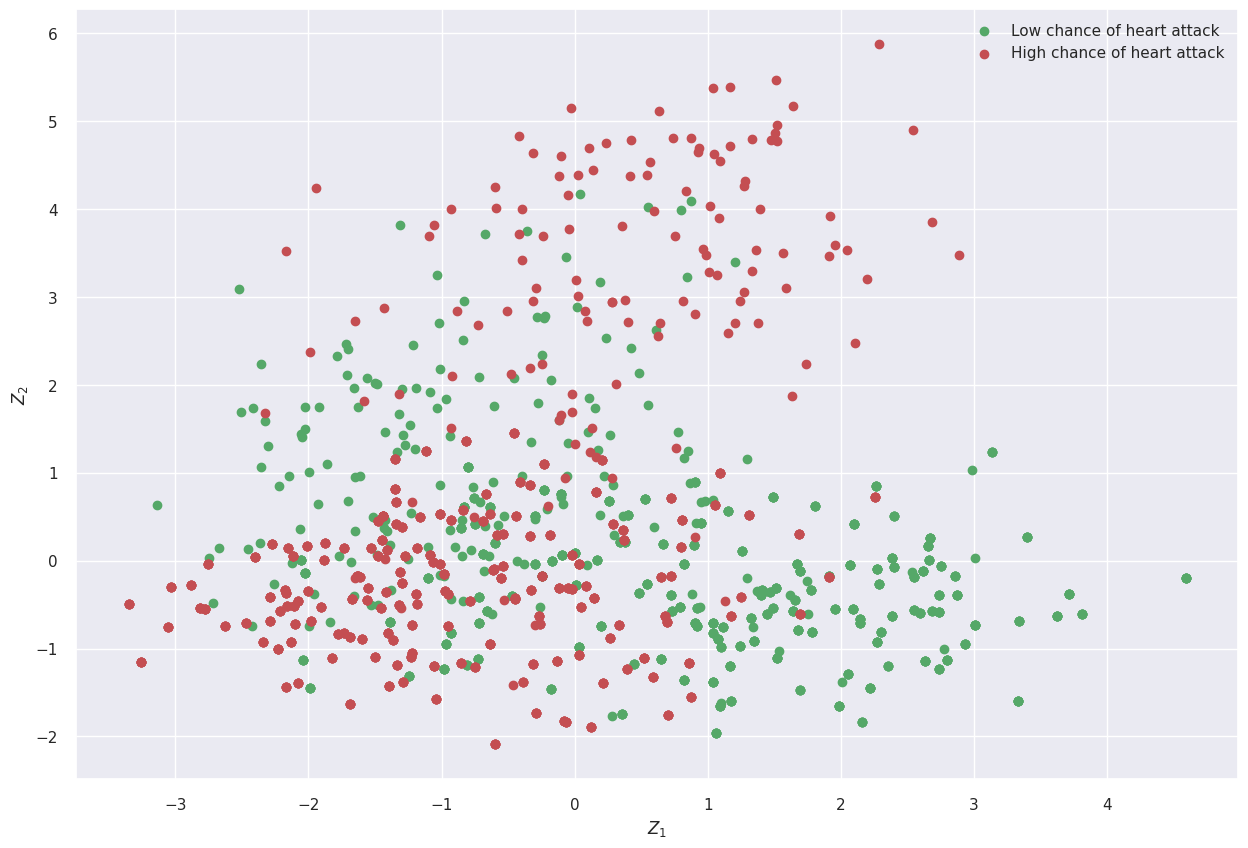

In [37]:
pca = PCA()
Z = pca.fit_transform(X)

# (High_HA)->1,  (Low_HA)->0

idx_low_HA= np.where(y == 0)
idx_High_HA = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_low_HA,0], Z[idx_low_HA,1], c='g', label='Low chance of heart attack')
plt.scatter(Z[idx_High_HA,0], Z[idx_High_HA,1], c='r', label='High chance of heart attack')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

array([[ 0.36682253,  0.11955796,  0.36757661,  0.03898063, -0.19616951,
        -0.28350459, -0.1745184 ,  0.13300064, -0.3254227 , -0.32782677,
         0.0450763 ,  0.21800926,  0.53346197],
       [ 0.06946405,  0.0990242 , -0.51067141, -0.46401071, -0.11784873,
         0.20420816, -0.14915544, -0.16219663, -0.04684575, -0.62058944,
        -0.01436904,  0.10621999, -0.0794884 ],
       [-0.19598782,  0.57597832,  0.06875307,  0.00465936,  0.27885818,
        -0.03331024, -0.21918391,  0.30678576, -0.03757934,  0.05498962,
        -0.149101  ,  0.53563314, -0.30081304],
       [ 0.22054694,  0.1476118 ,  0.3846755 , -0.19322694,  0.35449934,
         0.12403587,  0.05507528, -0.61416754, -0.36151935,  0.03345555,
        -0.18758173, -0.1228297 , -0.20218462],
       [ 0.14197934,  0.06125804,  0.44947955,  0.28540109, -0.21739399,
         0.54150959,  0.07660954,  0.06558215,  0.3921385 , -0.37342014,
         0.00631221,  0.01036691, -0.22040495],
       [ 0.10334572,  0.096267

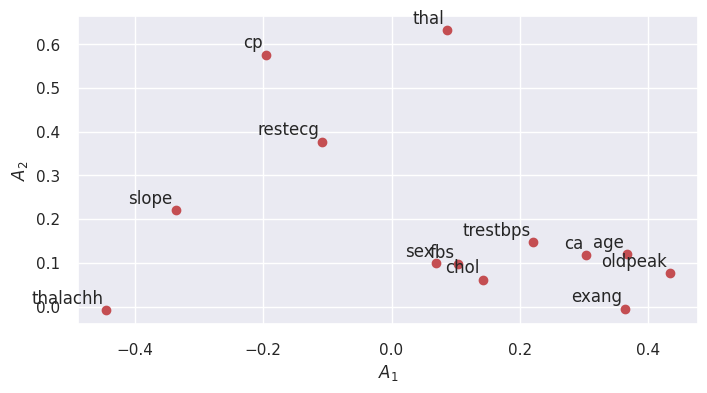

In [38]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

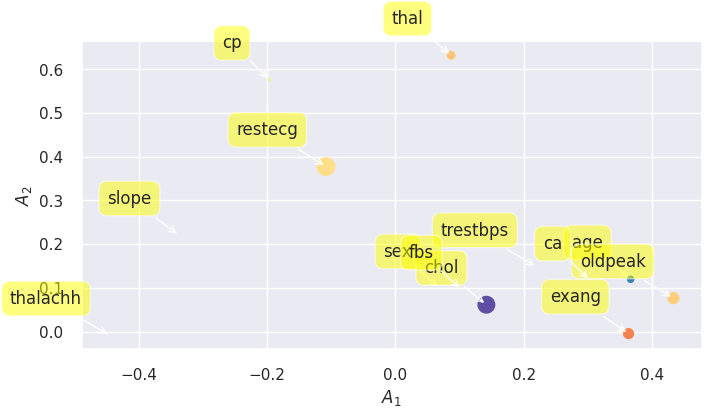

In [39]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([2.47079609, 1.58859369, 1.45974151, 1.13417731, 1.02066085,
       0.92822478, 0.85550214, 0.79381418, 0.77318784, 0.63884089,
       0.49047543, 0.42954355, 0.423331  ])

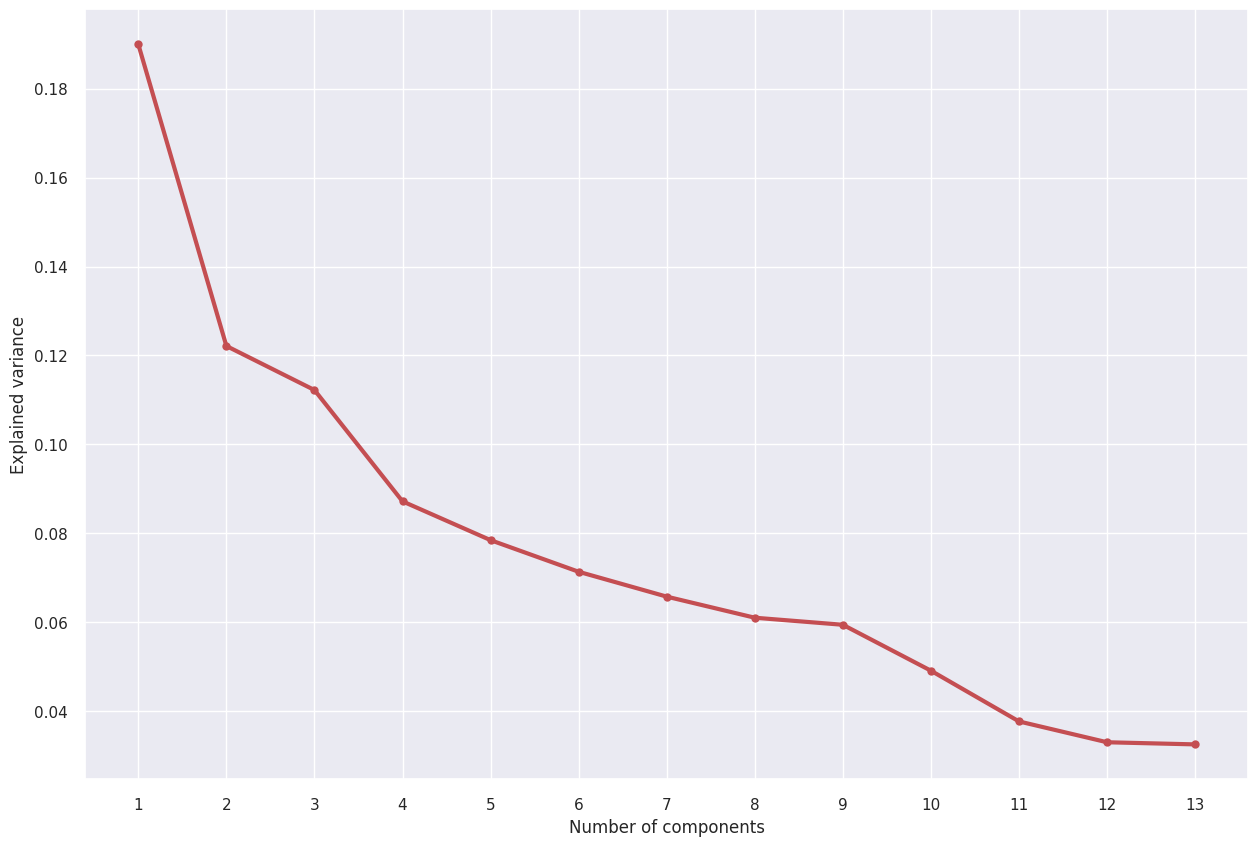

In [40]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

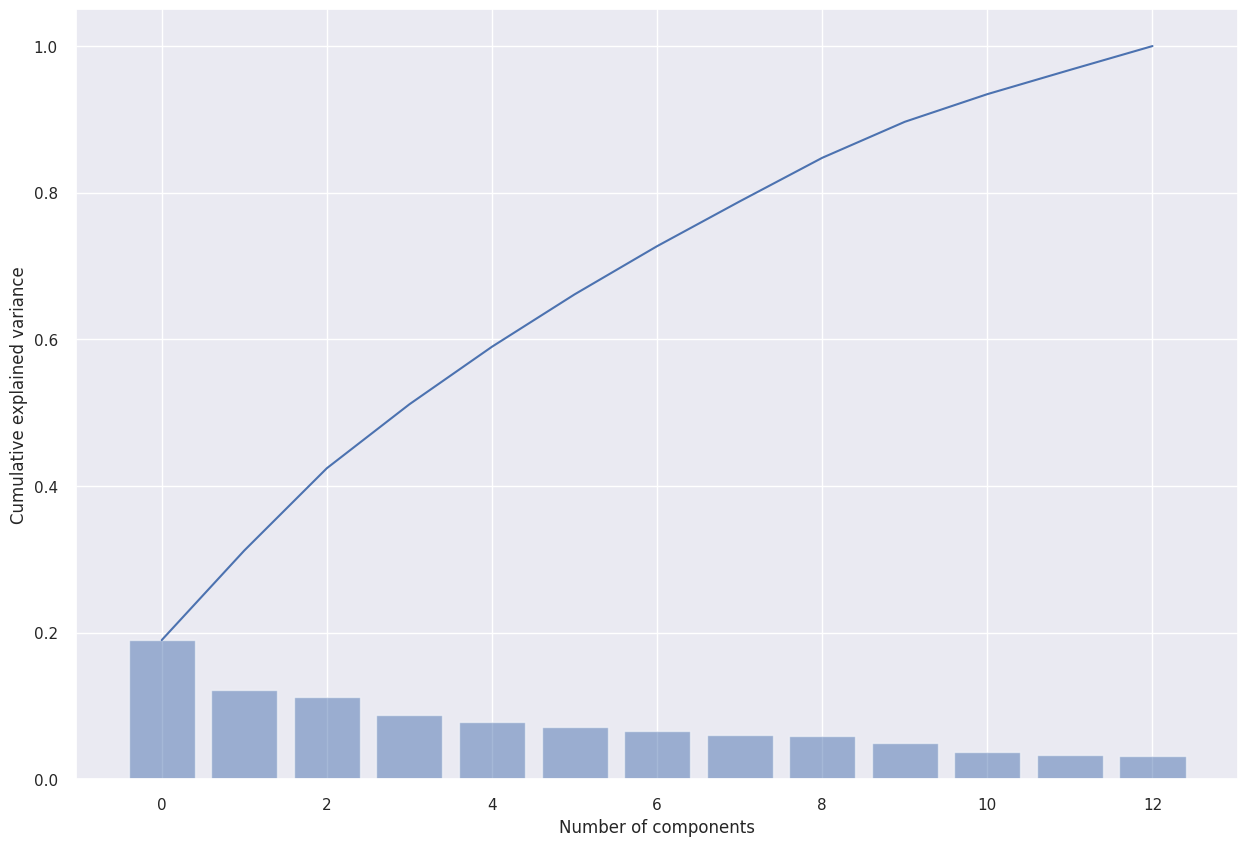

In [41]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-0.41593546, -0.42427643, -1.10173499, ...,  1.06764389,
       -0.45542499, -0.23038742])

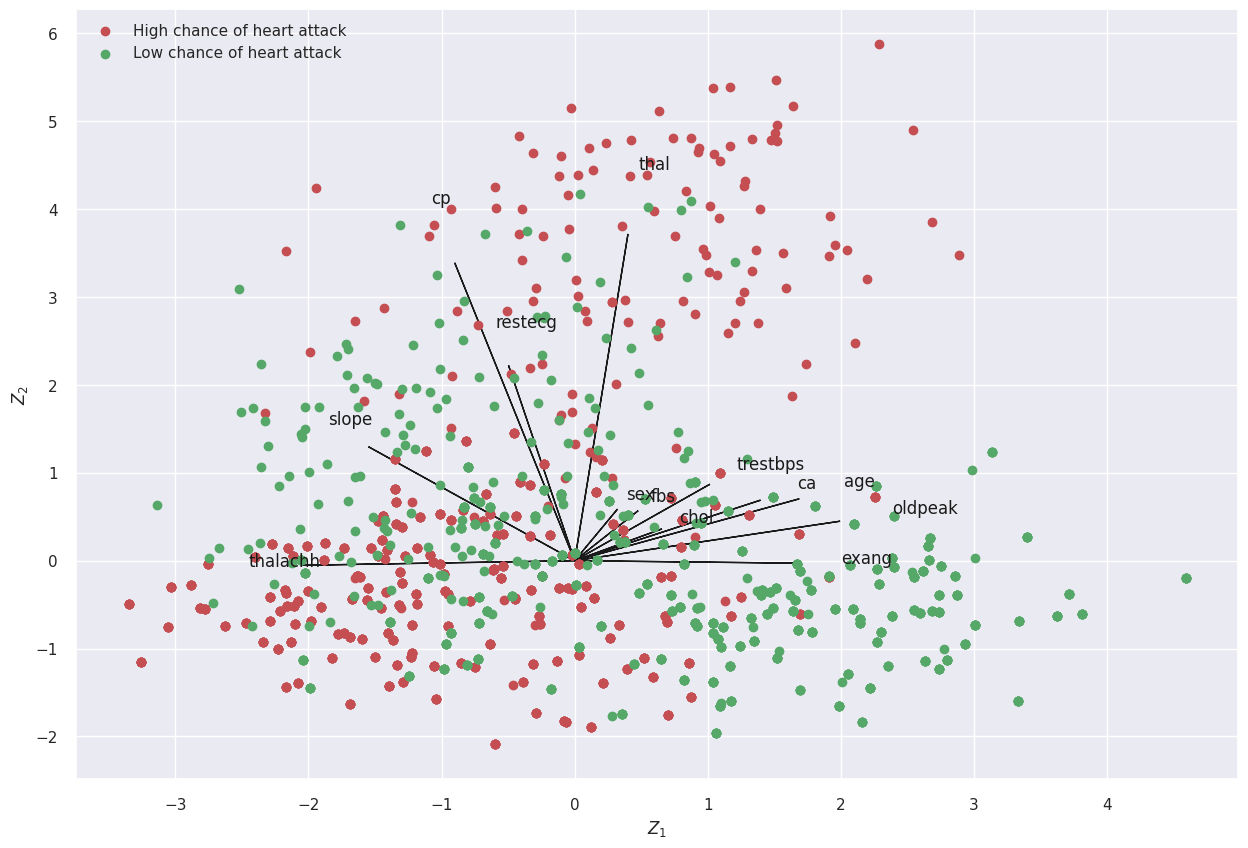

In [42]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_High_HA,0], Z[idx_High_HA,1], c='r', label='High chance of heart attack')
plt.scatter(Z[idx_low_HA,0], Z[idx_low_HA,1], c='g', label='Low chance of heart attack')

plt.legend(loc='upper left')
Z1
Z2

In [43]:
!pip install pca

In [44]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [45]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.248481 -0.415935  0.921018 -1.920063  2.895093 -0.667626 -0.224186   
1    -0.448484 -0.424276 -1.302539  0.358443  2.981894  0.409466 -0.580824   
2    -1.822286 -1.101735  0.271501  0.257388  0.688433  0.251490 -0.307757   
3    -1.612938 -0.187633 -0.245296 -0.016012 -0.396062 -0.189528 -0.064039   
4    -0.256898 -0.715516  1.197039  1.956373 -1.291782  1.178386  1.721071   
...        ...       ...       ...       ...       ...       ...       ...   
1883  1.367593 -0.343378 -0.842099 -0.452695 -0.835038  0.590613 -0.055066   
1884  2.072244 -0.053623 -0.928072  0.548057 -0.734020  0.796924  0.733421   
1885 -0.803006  1.067644  0.034403 -0.770769 -0.646076 -1.216729 -0.960186   
1886 -0.837680 -0.455425  0.667771 -1.164658 -0.394502  0.424461 -0.822625   
1887  1.748524 -0.230387 -1.173089  1.258458 -0.633134  1.108936  0.596419   

           PC8       PC9      PC10      PC11      PC12  
0     1.353114  0.314806 -1.237725  0.152716  0.995679  
1    -0.881896  2.381608 -0.549610  0.257703  0.500483  
2    -0.331503 -0.123242  1.685970  1.029932 -0.182035  
3    -0.582995  0.021400 -0.935827  0.700570  0.444462  
4    -0.040908  0.380652  0.017138  0.281184  0.568470  
...        ...       ...       ...       ...       ...  
1883 -0.685228 -1.388726  0.661731  0.668636  0.246950  
1884 -0.918731  0.964613 -0.026885 -0.663184 -0.418094  
1885 -0.782901 -0.043737 -0.053810 -0.189088  1.203825  
1886 -1.160716 -0.982769 -0.102003 -0.282970 -0.040142  
1887 -0.035991  1.693922 -0.667889  0.641755  0.345493  

[1888 rows x 12 columns]

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (18.9% expl.var)', ylabel='PC2 (12.2% expl.var)'>)

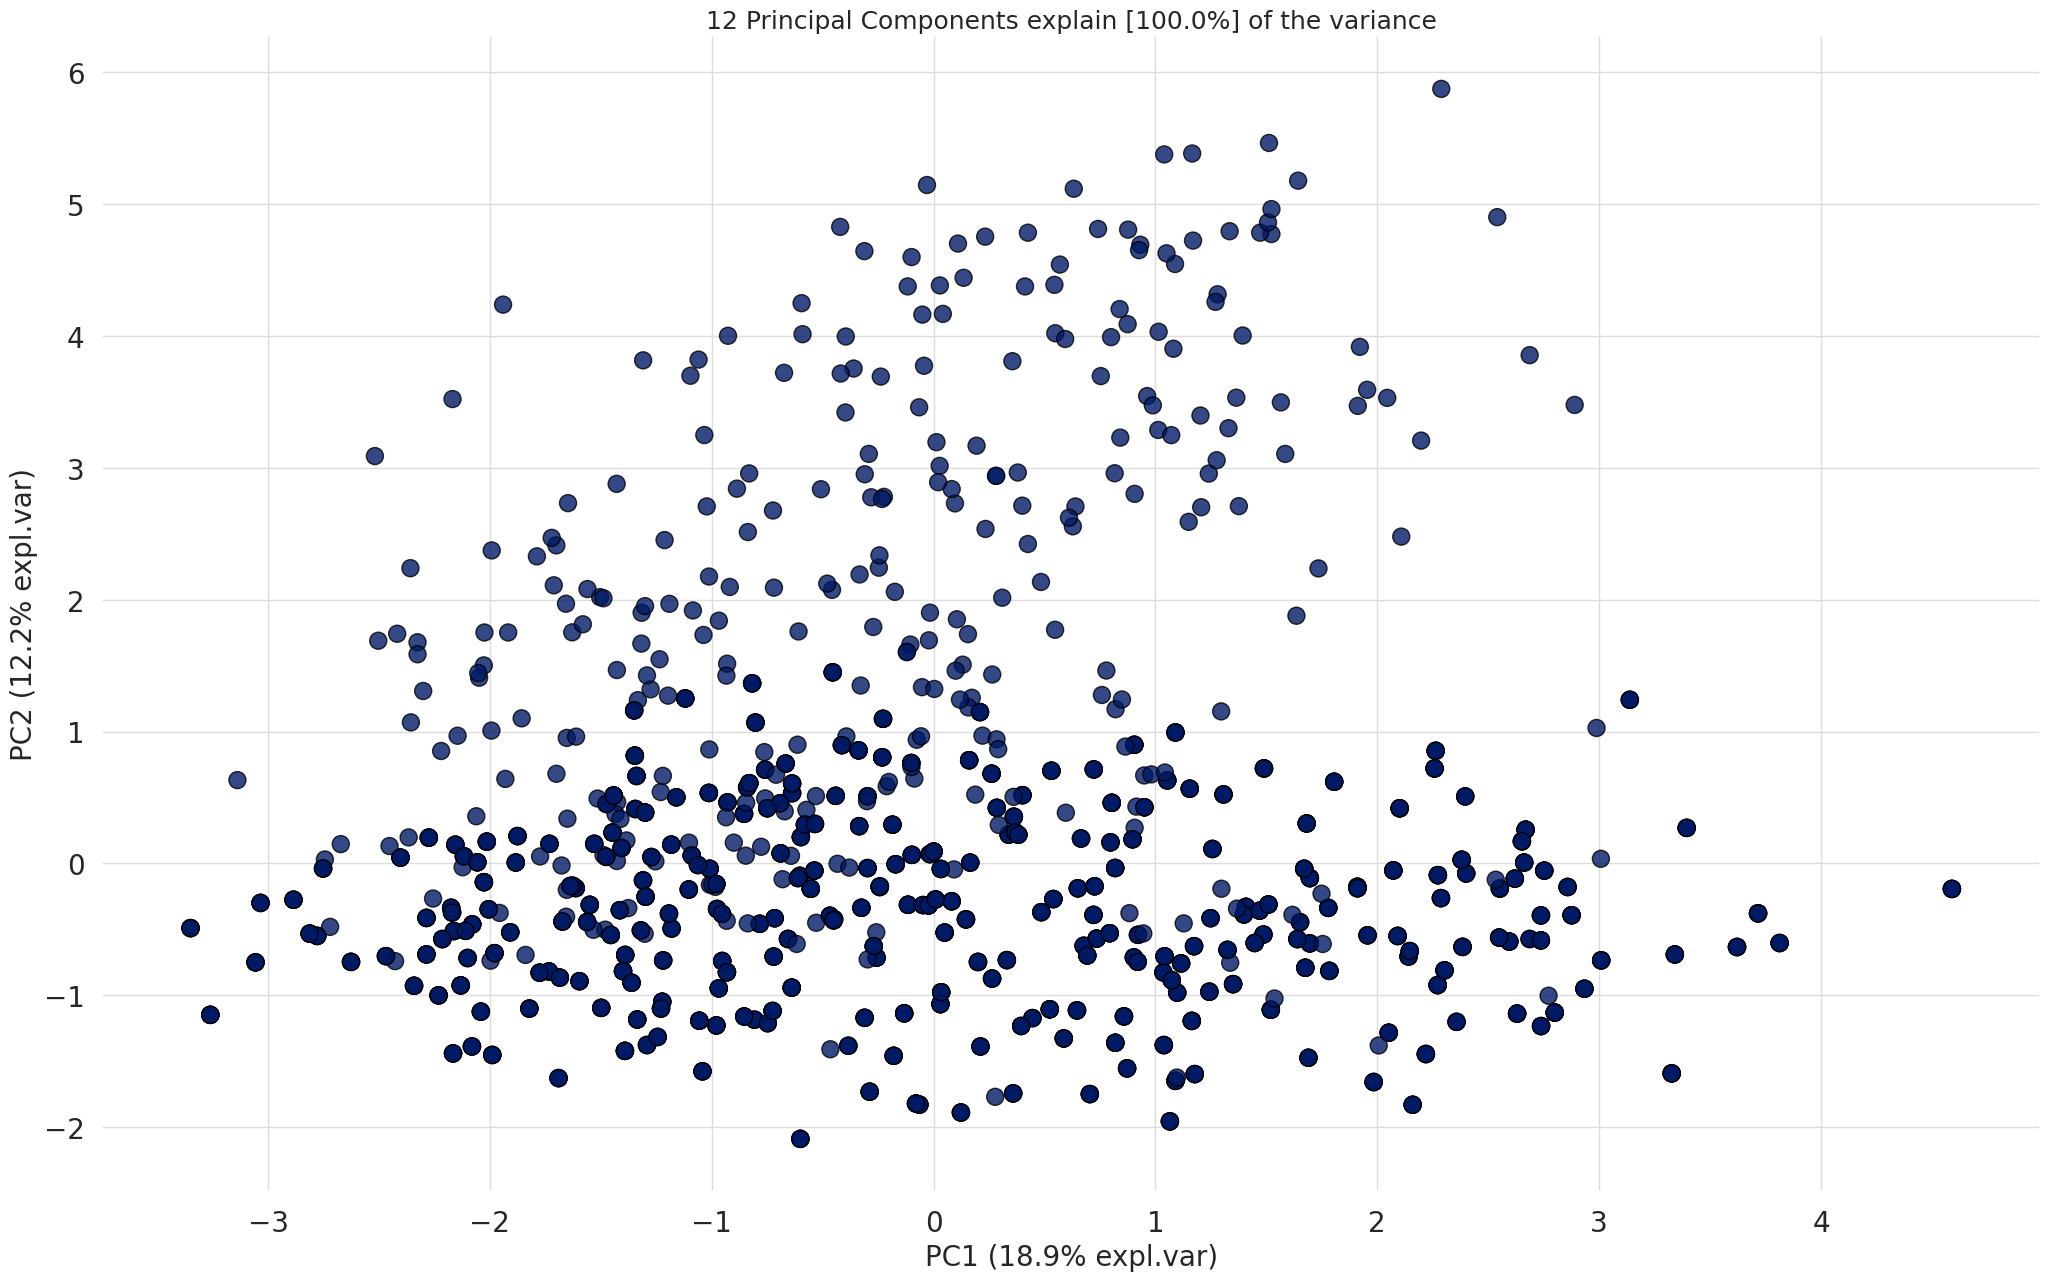

In [46]:
model.scatter(label=True, legend=False)

In [47]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.366823  0.119558  0.367577  0.038981 -0.196170 -0.283505   
sex       0.069464  0.099024 -0.510671 -0.464011 -0.117849  0.204208   
cp       -0.195988  0.575978  0.068753  0.004659  0.278858 -0.033310   
trestbps  0.220547  0.147612  0.384675 -0.193227  0.354499  0.124036   
chol      0.141979  0.061258  0.449480  0.285401 -0.217394  0.541510   
fbs       0.103346  0.096267  0.236212 -0.636667  0.145865 -0.095720   
restecg  -0.107930  0.377185 -0.128461  0.313266 -0.025725 -0.474934   
thalachh -0.444978 -0.008886  0.146353 -0.197091  0.155327  0.253979   
exang     0.363607 -0.004787 -0.285803  0.098456 -0.120472  0.349205   
oldpeak   0.433509  0.076310 -0.158737  0.119950  0.327703  0.002688   
slope    -0.336650  0.220186  0.114886 -0.087715 -0.552472  0.090288   
ca        0.303331  0.116909  0.063272 -0.294939 -0.472322 -0.237569   
thal      0.087114  0.631662 -0.177673  0.057207 -0.025617  0.287097   

               PC7       PC8       PC9      PC10      PC11      PC12  
age      -0.174518  0.133001 -0.325423 -0.327827  0.045076  0.218009  
sex      -0.149155 -0.162197 -0.046846 -0.620589 -0.014369  0.106220  
cp       -0.219184  0.306786 -0.037579  0.054990 -0.149101  0.535633  
trestbps  0.055075 -0.614168 -0.361519  0.033456 -0.187582 -0.122830  
chol      0.076610  0.065582  0.392138 -0.373420  0.006312  0.010367  
fbs       0.517326  0.371820  0.182870 -0.008599  0.195602 -0.103986  
restecg   0.491900 -0.339294  0.247929 -0.283632 -0.073463 -0.010871  
thalachh -0.046561 -0.303975  0.330829  0.064019 -0.042215  0.266991  
exang     0.507900  0.016725 -0.174063  0.286382 -0.232847  0.437245  
oldpeak  -0.154676 -0.191587  0.271364  0.119941  0.691878  0.178214  
slope     0.119264 -0.197116 -0.324450  0.174828  0.532516  0.110809  
ca       -0.266537 -0.205084  0.438066  0.350695 -0.277991  0.071531  
thal     -0.106956  0.129276 -0.023686  0.171000 -0.033159 -0.562617

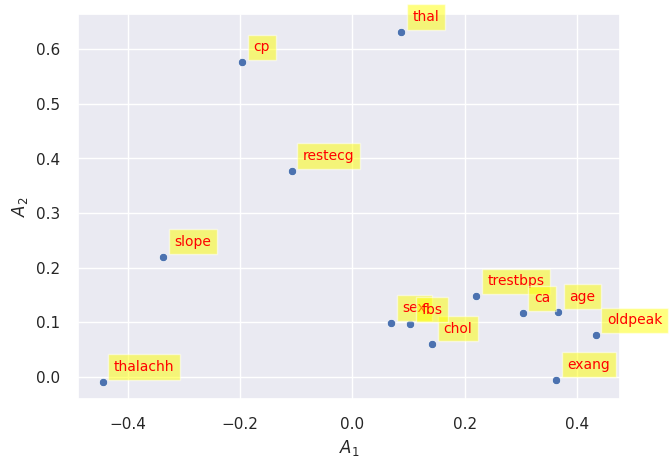

In [48]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

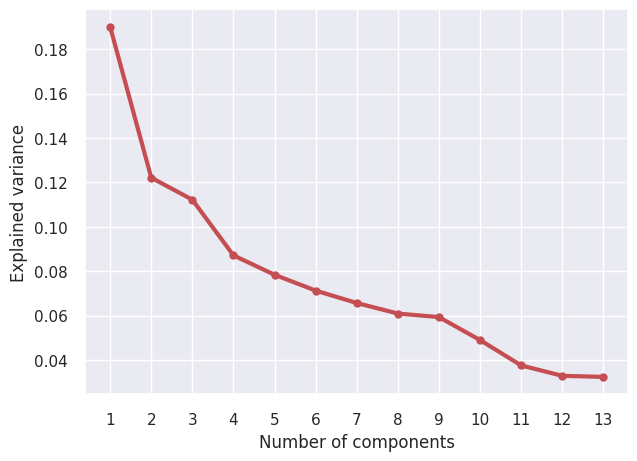

In [49]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

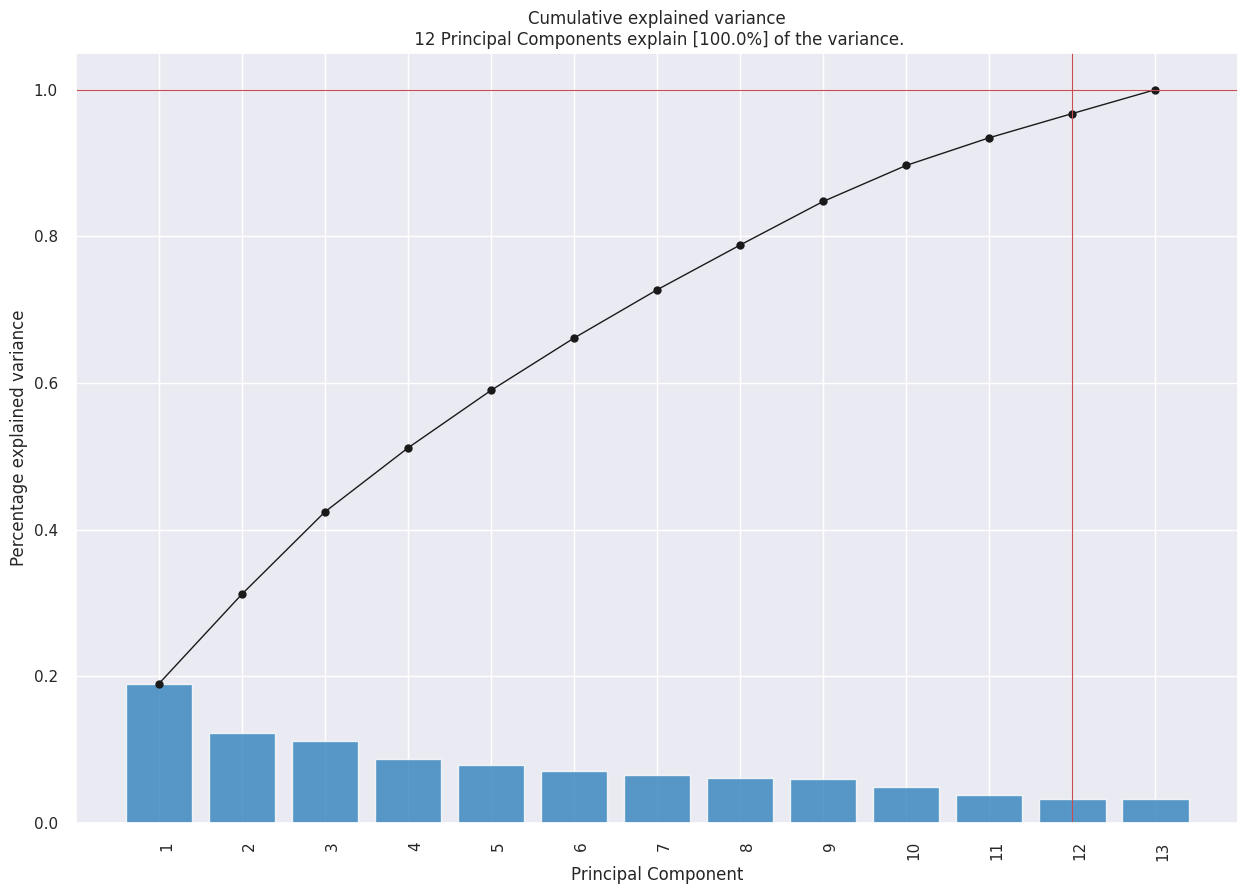

In [50]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (18.9% expl.var)', ylabel='PC2 (12.2% expl.var)'>)

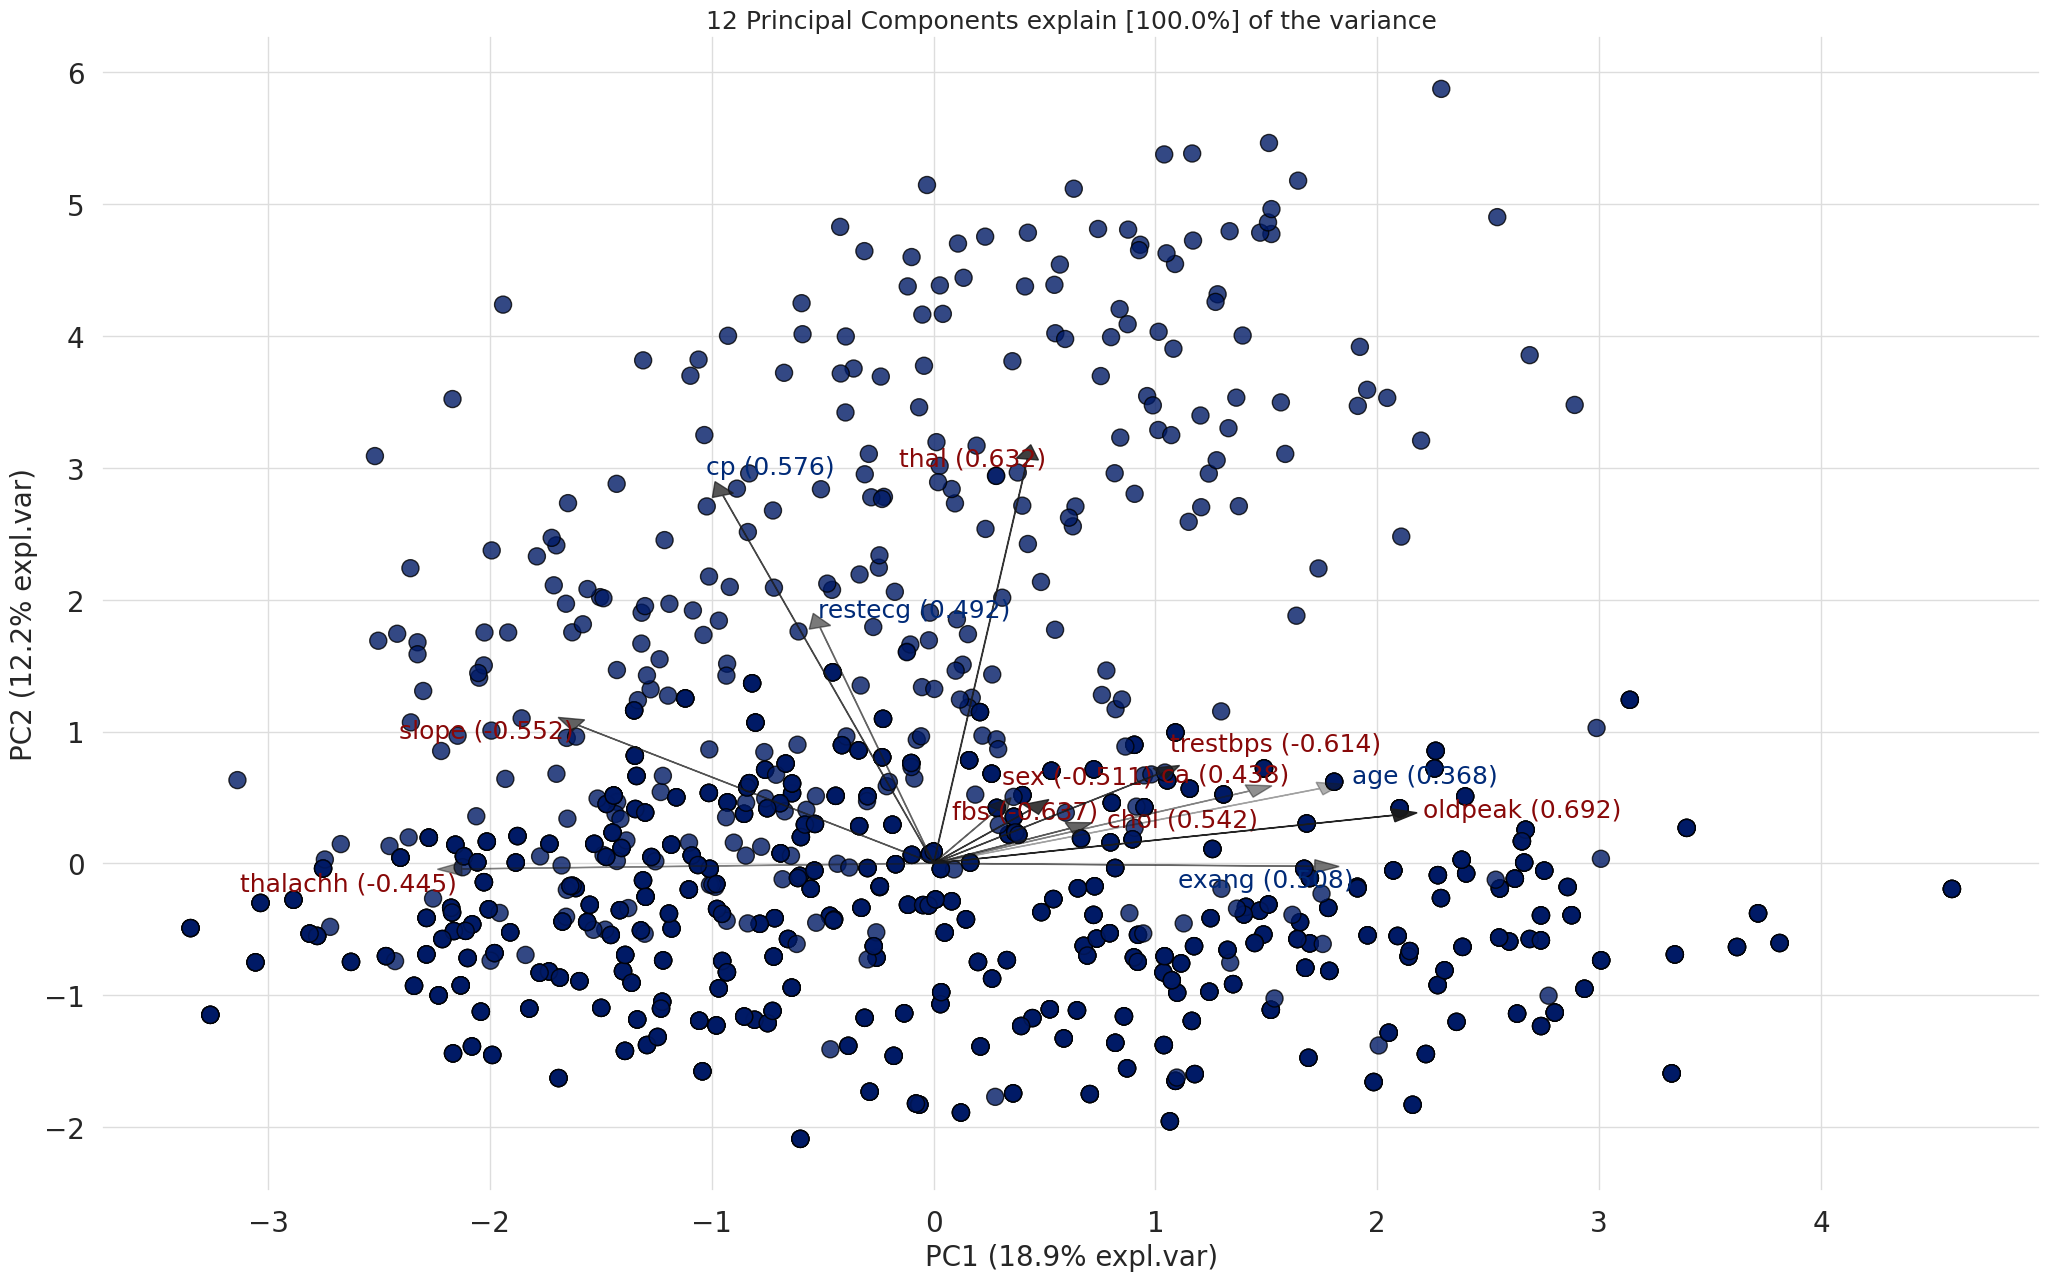

In [51]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (18.9% expl.var)', ylabel='PC2 (12.2% expl.var)', zlabel='PC3 (11.2% expl.var)'>)

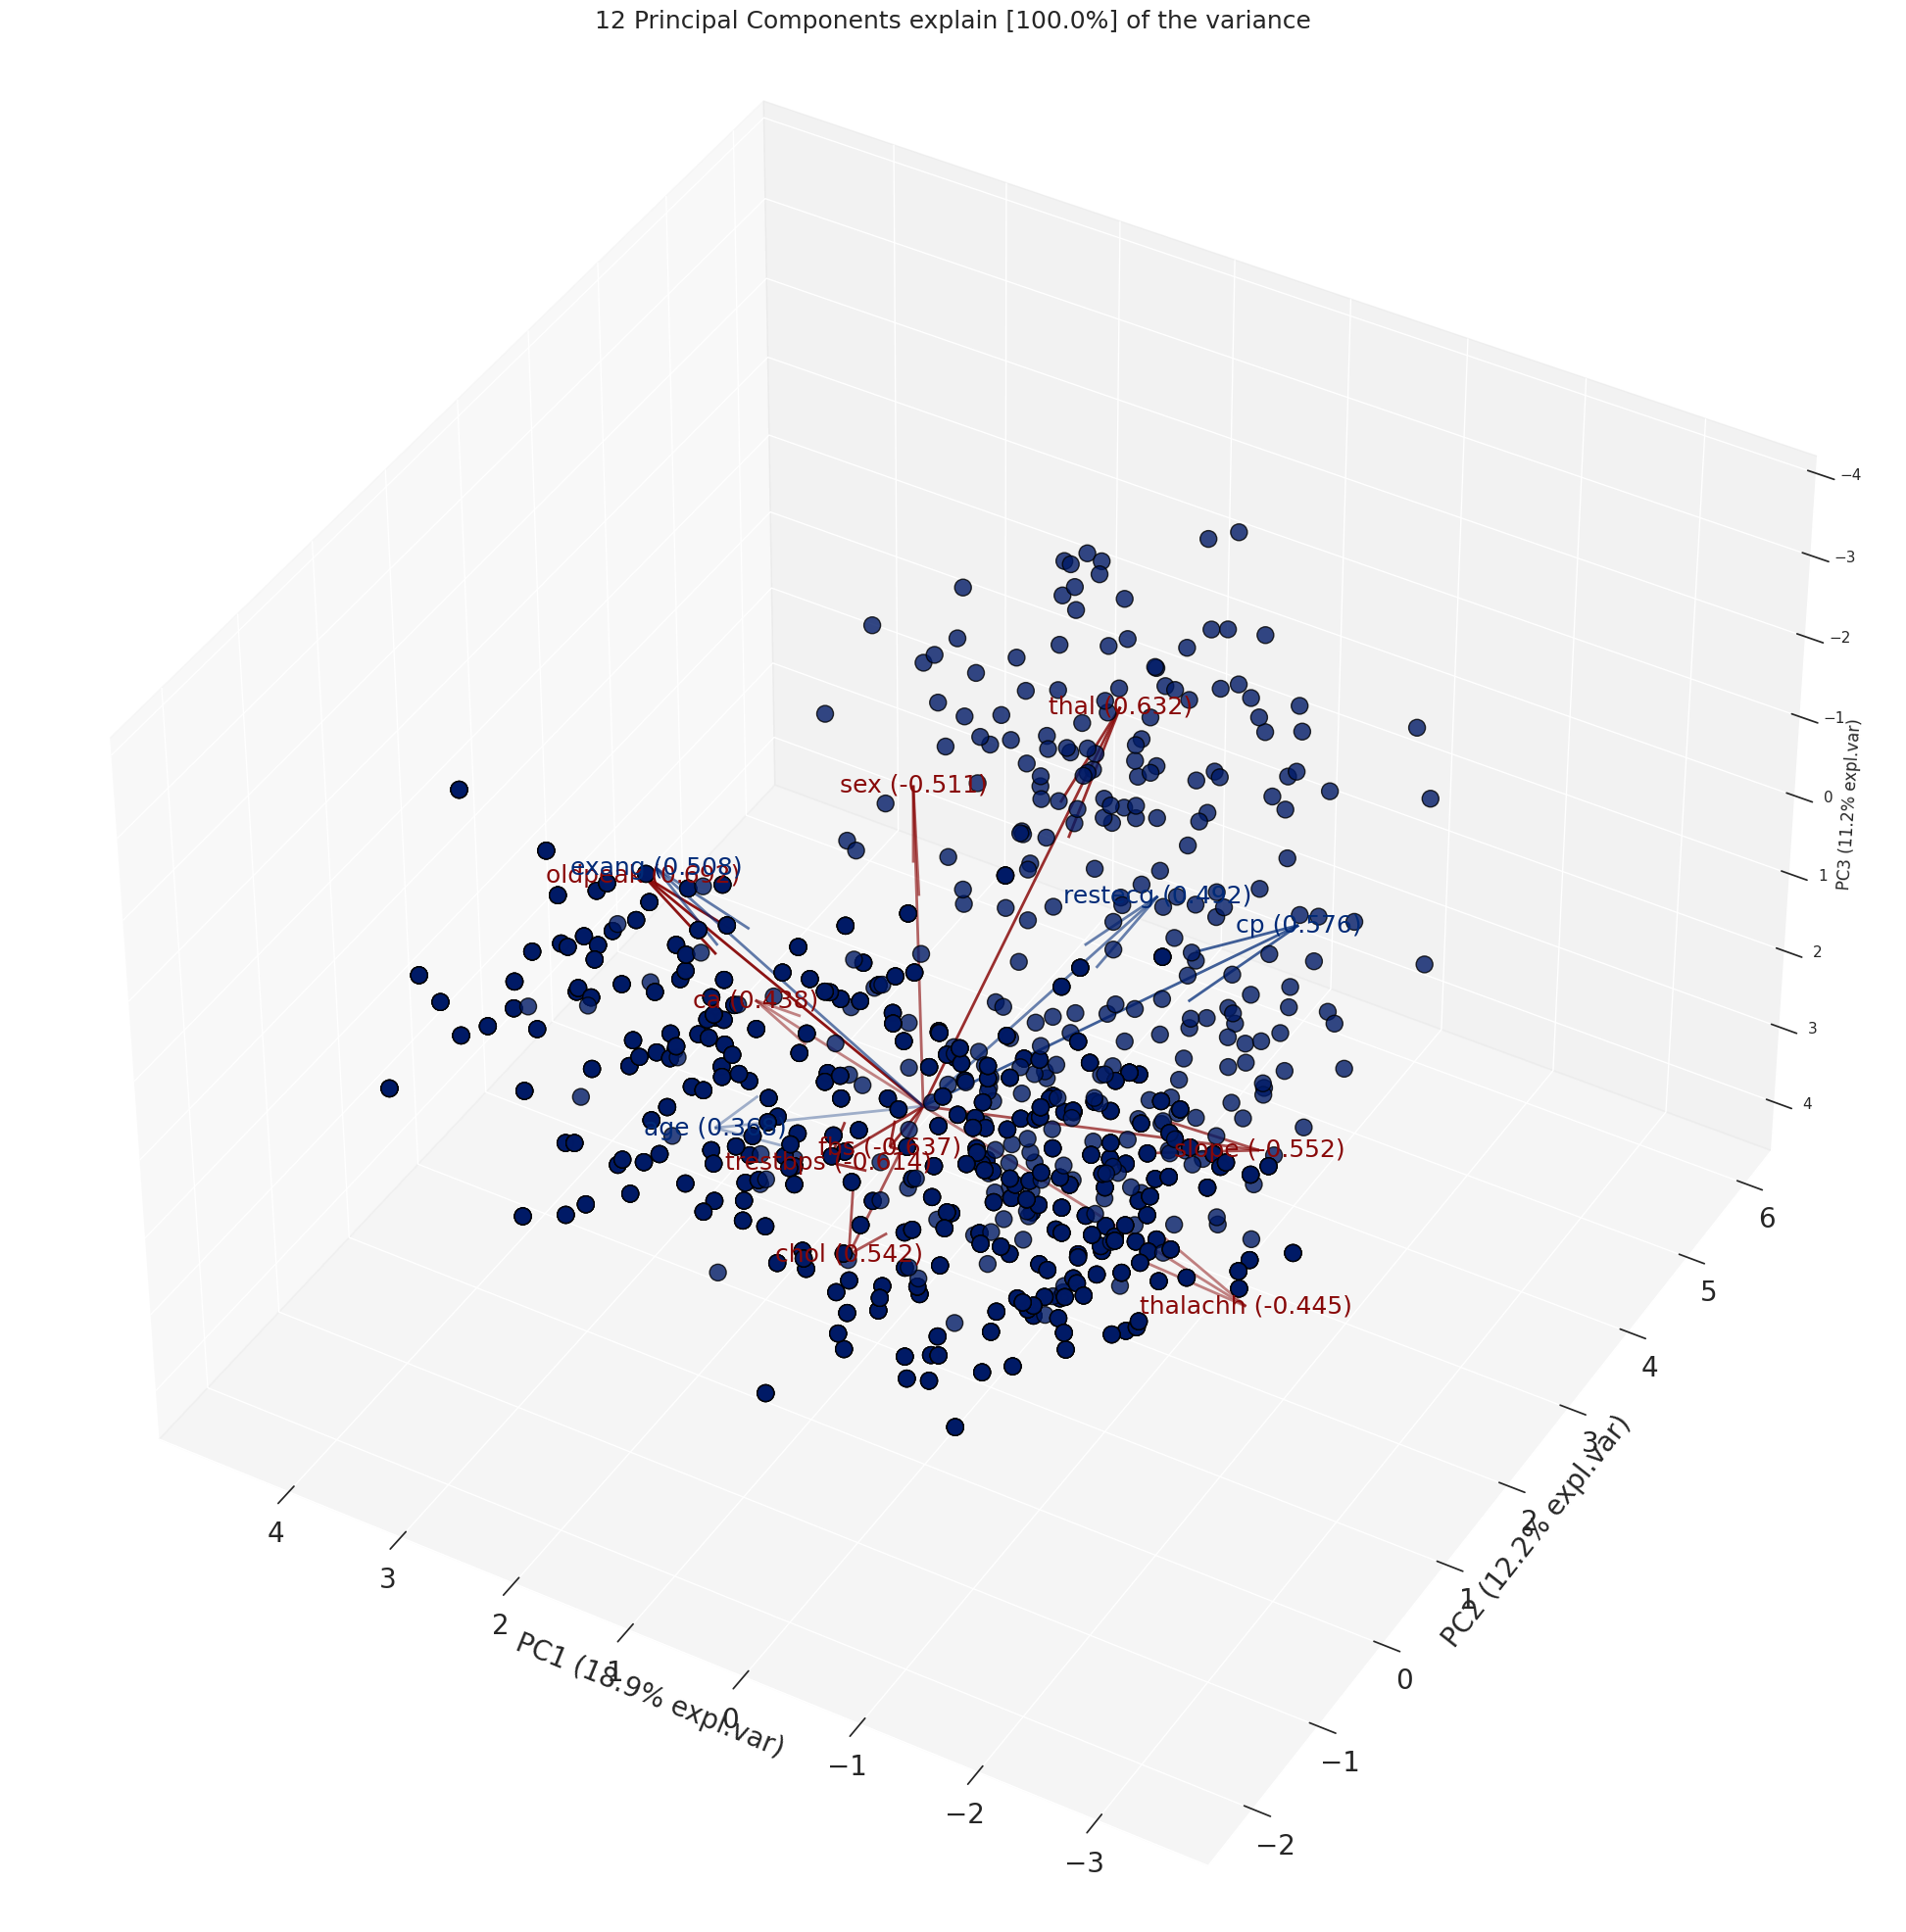

In [52]:
model.biplot3d(legend=False)

In [53]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [54]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1699, 14)
Unseen Data For Predictions: (189, 14)


In [55]:
# #For Google Colab only
# from pycaret.utils import enable_colab
# enable_colab()

In [56]:
from pycaret.classification import *
clf = setup(data=data, target='target', train_size=0.7, session_id=123)


In [57]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [58]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [59]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [61]:
tuned_lr


LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [63]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='distance')

In [66]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [67]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [69]:
tuned_qda


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [70]:
evaluate_model(tuned_qda)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [71]:
!pip install statsmodels --upgrade

In [72]:
clf_pca = setup(data=data, target='target', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [73]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [74]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [75]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [76]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [79]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [81]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [83]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')

In [84]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [85]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [87]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [88]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [89]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [90]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [91]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [92]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [93]:
!pip install shap

In [94]:
import shap

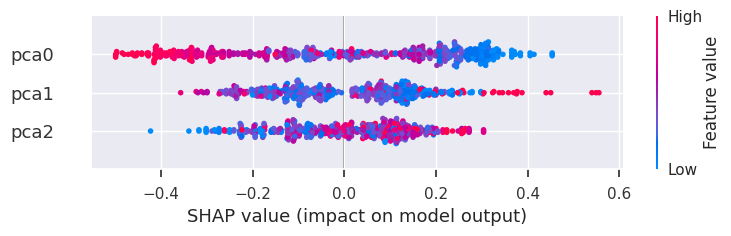

In [95]:
interpret_model(tuned_et_pca, plot='summary')


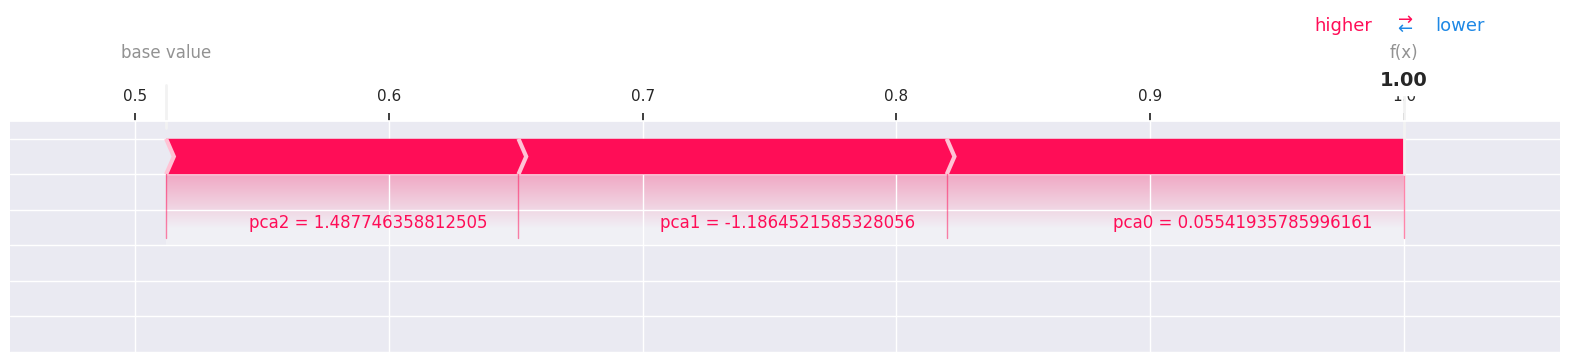

In [98]:
interpret_model(tuned_et_pca, plot='reason', observation=32, matplotlib=True)


In [99]:
interpret_model(tuned_et_pca, plot='reason')
